# Chapter 3 - Regression Models
## Segment 2 - Multiple linear regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [3]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [8]:
address = 'C:/Users/cmok1/Desktop/Course material/MachineLearning/sklearn_linkedin/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll["year"] = enroll["year"] + 1960
enroll.head()

,year,roll,unem,hgrad,inc
0,1961,5501,8.1,9552,1923
1,1962,5945,7.0,9680,1961
2,1963,6629,7.3,9731,1979
3,1964,7556,7.5,11666,2030
4,1965,8716,7.0,14675,2112


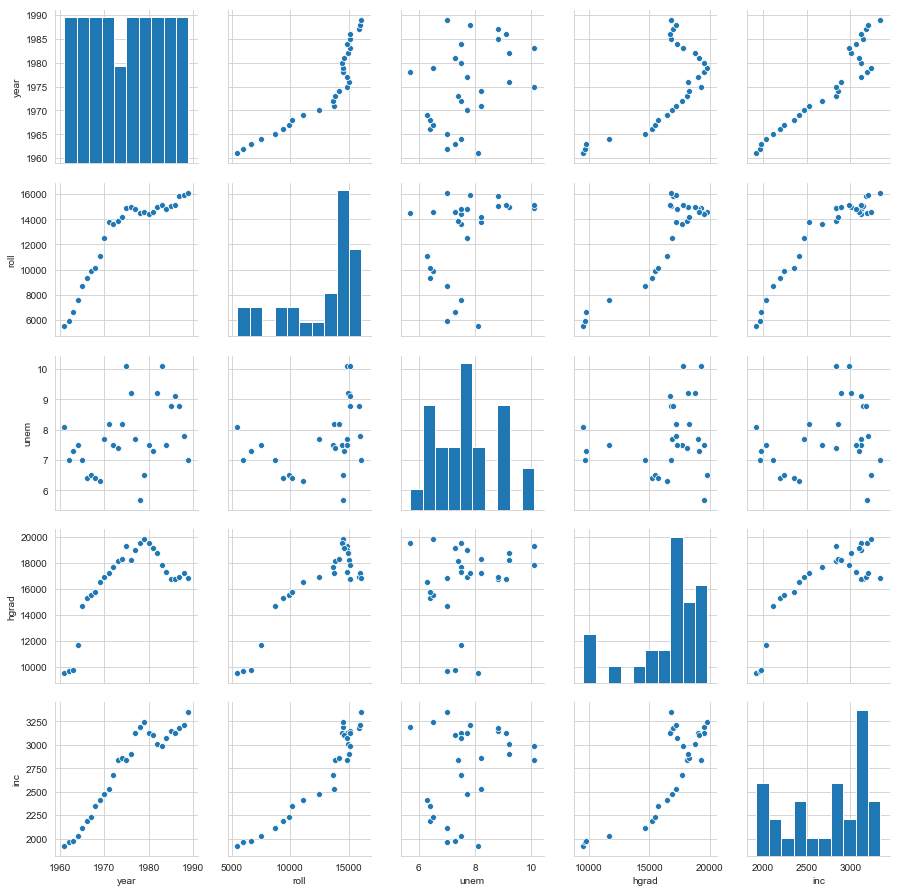

In [10]:
#Check for linear correlation between predictors and predictors
sb.pairplot(enroll) #scatterplot matrix

In [7]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [14]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target
print(X,y)

[[ 0.34682081 -2.42562243]
 [-0.64989846 -2.38111647]
 [-0.37806593 -2.36338363]
 [-0.19684425 -1.69057879]
 [-0.64989846 -0.64434118]
 [-1.19356352 -0.43919655]
 [-1.10295268 -0.36304964]
 [-1.19356352 -0.27994868]
 [-1.28417436 -0.00943593]
 [-0.01562256  0.12582044]
 [ 0.43743166  0.23465141]
 [-0.19684425  0.4098936 ]
 [-0.28745509  0.5493224 ]
 [ 0.43743166  0.60425944]
 [ 2.15903768  0.96656572]
 [ 1.34354009  0.58965593]
 [-0.01562256  0.85843016]
 [-1.82783942  1.03506316]
 [-1.10295268  1.13763548]
 [-0.19684425  1.04931898]
 [-0.37806593  0.90015449]
 [ 1.34354009  0.78089244]
 [ 2.15903768  0.44675009]
 [-0.19684425  0.26976938]
 [ 0.98109672  0.07922827]
 [ 1.25292925  0.07679435]
 [ 0.98109672  0.13799004]
 [ 0.07498828  0.24438708]
 [-0.64989846  0.10009044]] [[ 5501]
 [ 5945]
 [ 6629]
 [ 7556]
 [ 8716]
 [ 9369]
 [ 9920]
 [10167]
 [11084]
 [12504]
 [13746]
 [13656]
 [13850]
 [14145]
 [14888]
 [14991]
 [14836]
 [14478]
 [14539]
 [14395]
 [14599]
 [14969]
 [15107]
 [14831]


### Checking for missing values

In [19]:
missing_values = X==np.NAN
print(missing_values)
X[missing_values == True] #empty array means no missing values

[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


array([], dtype=float64)

In [10]:
LinReg = LinearRegression(normalize=True) #normalize our variables before regression

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723
